In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../src')

from clean import as_date

In [2]:
raw_data = pd.read_json('../data/interim/split_data.json')

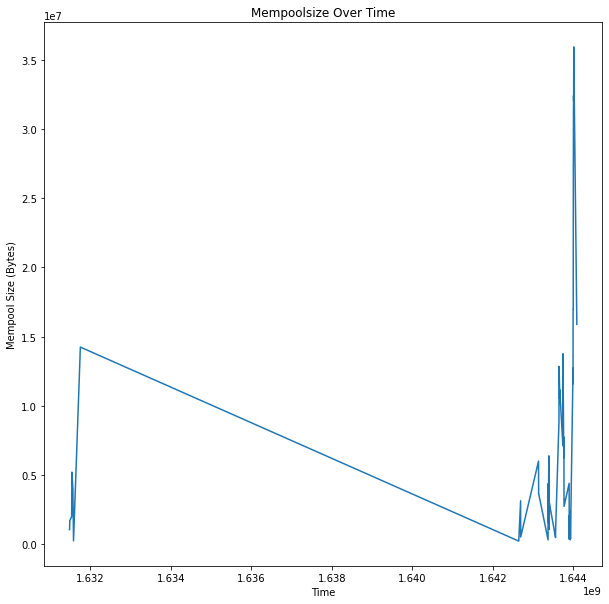

In [3]:
raw_data = raw_data.sort_values(by = ['mempooldate'])
plt.figure(figsize = (10,10))
plt.plot(raw_data.mempooldate, raw_data.mempoolsize)
plt.title('Mempoolsize Over Time')
plt.ylabel('Mempool Size (Bytes)')
plt.xlabel('Time');

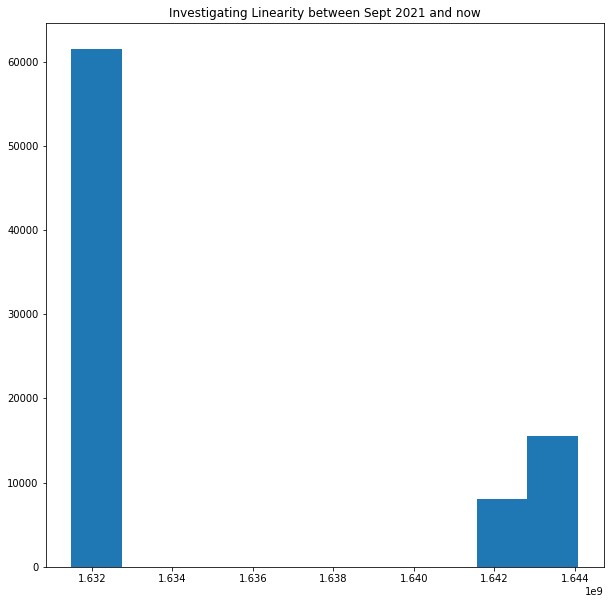

In [4]:
plt.figure(figsize=(10,10))
plt.hist(raw_data.mempooldate)
plt.title('Investigating Linearity between Sept 2021 and now');

In [5]:
# We're missing data between sept and now, subsetting to where 2022 data starts
# picking arbitrary date where we have no data (and is after fall data, 1634000000)
from pandas.core.tools.datetimes import to_datetime
import numpy as np
def filter_time(x):
  if x >= 1634000000:
    return x
  else:
    return np.nan

raw_data.set_index('mempooldate', drop = False).mempooldate.map(filter_time).dropna()

mempooldate
1642641211    1.642641e+09
1642641211    1.642641e+09
1642641214    1.642641e+09
1642641214    1.642641e+09
1642641214    1.642641e+09
                  ...     
1644084626    1.644085e+09
1644084627    1.644085e+09
1644084628    1.644085e+09
1644084628    1.644085e+09
1644084628    1.644085e+09
Name: mempooldate, Length: 23594, dtype: float64

In [19]:
# first time stamp for 2022 data is 1642641211
df = raw_data.set_index('mempooldate').loc[1642641211:,:].reset_index() # ~ the end of january
df.mempooldate = pd.to_datetime(df.mempooldate.apply(as_date))

In [20]:
df = df.groupby('mempooldate').mean()

df = df.resample('15min').pad().iloc[1:,:]

# df.drop('txid', axis=1, inplace=True)
# df.drop('hash', axis=1, inplace=True)
df.drop(columns = ['dayofweek', 'hourofday', 'conf', 'vsize', 'locktime', 'version'], inplace = True)

In [21]:
df.head()

,feerate,fee,mempoolgrowthrate,networkdifficulty,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,size,weight
mempooldate,,,,,,,,,,,
2022-01-19 20:15:00,1.914000,426.5,857.316667,2.437187e+13,9.621263,209012.0,4.679014e+07,1.929798e+08,42381.48,222.5,563.0
2022-01-19 20:30:00,6.132743,3124.0,857.316667,2.437187e+13,9.621263,209012.0,4.679014e+07,1.929798e+08,42381.48,394.5,1413.0
2022-01-19 20:45:00,6.132743,3124.0,857.316667,2.437187e+13,9.621263,209012.0,4.679014e+07,1.929798e+08,42381.48,394.5,1413.0
2022-01-19 21:00:00,6.132743,3124.0,857.316667,2.437187e+13,9.621263,209012.0,4.679014e+07,1.929798e+08,42381.48,394.5,1413.0
2022-01-19 21:15:00,6.132743,3124.0,857.316667,2.437187e+13,9.621263,209012.0,4.679014e+07,1.929798e+08,42381.48,394.5,1413.0


In [22]:
df.corr()

,feerate,fee,mempoolgrowthrate,networkdifficulty,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,size,weight
feerate,1.000000,0.545416,-0.060286,0.131676,-0.069014,0.485551,-0.102693,0.236199,-0.140077,-0.109432,-0.108001
fee,0.545416,1.000000,-0.129340,0.170595,-0.000048,0.367439,-0.194671,0.117733,-0.178922,0.452177,0.449275
mempoolgrowthrate,-0.060286,-0.129340,1.000000,-0.738107,-0.667231,-0.181224,0.674219,0.526375,0.611495,-0.221691,-0.222578
networkdifficulty,0.131676,0.170595,-0.738107,1.000000,0.624582,0.368222,-0.948302,-0.677896,-0.959410,0.241612,0.241484
averageconfirmationtime,-0.069014,-0.000048,-0.667231,0.624582,1.000000,-0.065528,-0.510930,-0.468480,-0.485776,0.178159,0.176083
mempoolsize,0.485551,0.367439,-0.181224,0.368222,-0.065528,1.000000,-0.338967,0.323551,-0.373247,-0.043545,-0.042923
minerrevenue,-0.102693,-0.194671,0.674219,-0.948302,-0.510930,-0.338967,1.000000,0.731125,0.956000,-0.432940,-0.437701
totalhashrate,0.236199,0.117733,0.526375,-0.677896,-0.468480,0.323551,0.731125,1.000000,0.685815,-0.317049,-0.320368
marketprice,-0.140077,-0.178922,0.611495,-0.959410,-0.485776,-0.373247,0.956000,0.685815,1.000000,-0.272902,-0.273826
size,-0.109432,0.452177,-0.221691,0.241612,0.178159,-0.043545,-0.432940,-0.317049,-0.272902,1.000000,0.995029


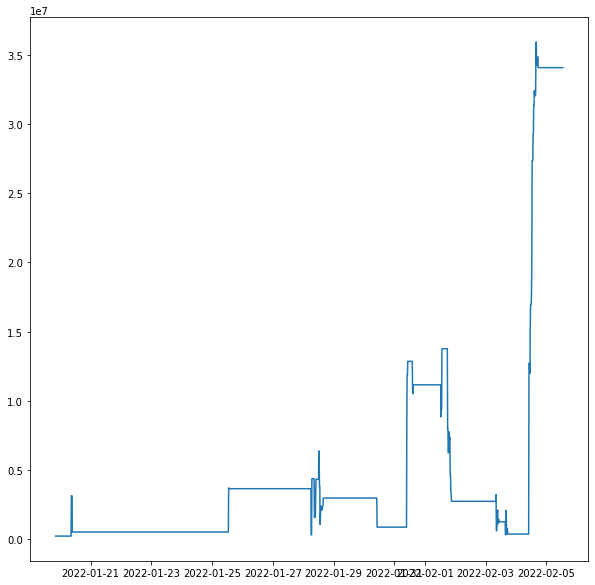

In [23]:
plt.figure(figsize = (10, 10))
plt.plot(df.index, df.mempoolsize);

In [35]:
import seaborn as sns

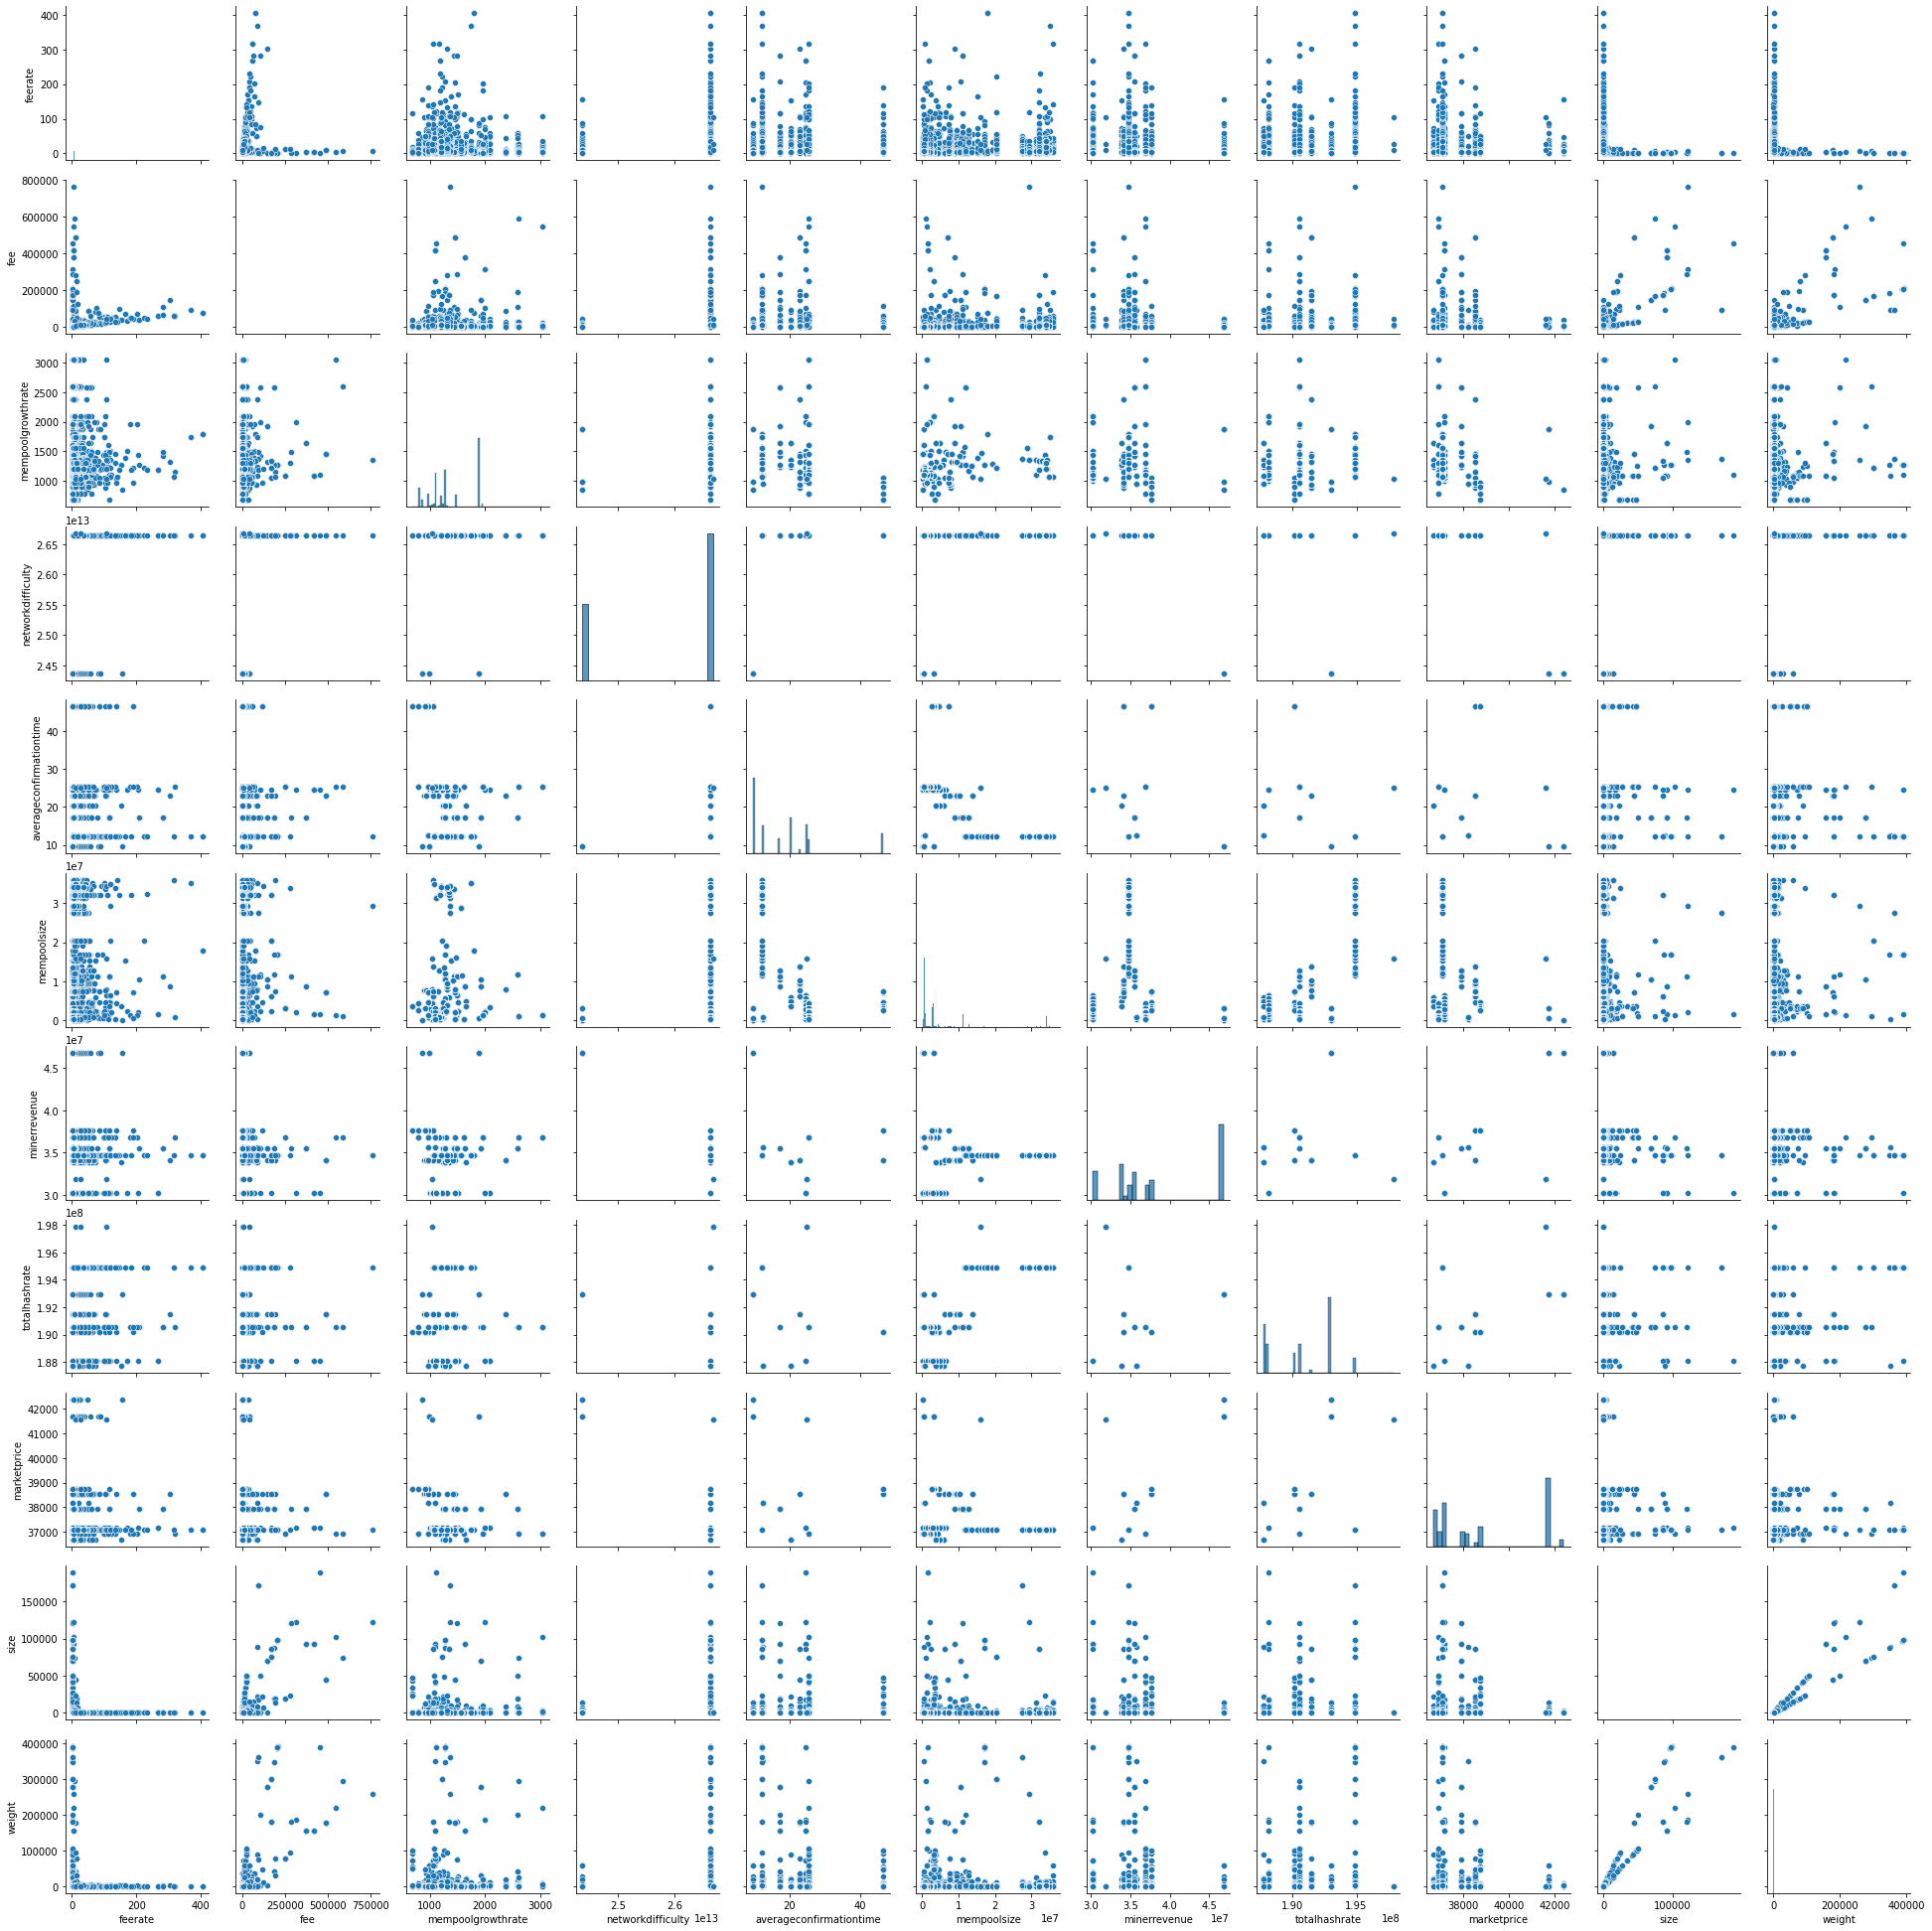

In [36]:
sns.pairplot(df)

# Predicting Mempoolsize 

In [50]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def model_lm(df, col = None, shift = None):
    train_df = df[[col]]

    for i in range(1,shift):
        train_df[f'input_{i}'] = train_df[col].shift(i)
    train_df.dropna(inplace = True)
    train_df['time'] = range(0, len(train_df))
    X = train_df.drop(columns = [col])
    y = train_df[col]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = 0.1,
                                                        shuffle=False)
    X_train = sm.add_constant(X_train)
    
    lm = sm.OLS(y_train, X_train)

    lm_results = lm.fit()
    
    X_test = sm.add_constant(X_test)
    
    preds = []
    for _ in range(len(y_test)):
        preds.append(y_train.mean())
    print('r2_score') 
    print(f"baseline: {r2_score(y_test, preds)}")
    print(f"model: {r2_score(y_test, lm_results.predict(X_test))}")

    
    print('mean_absolute_error') 
    print(f"baseline: {mean_absolute_error(y_test, preds)}")
    print(f"model: {mean_absolute_error(y_test, lm_results.predict(X_test))}")
    
    print('mean_squared_error') 
    print(f"baseline: {mean_squared_error(y_test, preds)}")
    print(f"model: {mean_squared_error(y_test, lm_results.predict(X_test))}")
    
    return lm_results, X_test, y_test

In [51]:
from statsmodels.tsa.stattools import adfuller
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

In [52]:
interpret_dftest(adfuller(df['mempoolsize'].diff(1).dropna()))

Test Statistic   -7.362664e+00
p-value           9.411193e-11
Lag Used          2.100000e+01
dtype: float64

In [53]:
my_model, X_test, y_test = model_lm(df, col = 'mempoolsize', shift = 4)

r2_score
baseline: -1.4706920508864747
model: 0.9932770790997127
mean_absolute_error
baseline: 20407146.252016477
model: 471666.9817290849
mean_squared_error
baseline: 596471142684528.9
model: 1623038496494.6294


<ipython-input-50-725ed156d6e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'input_{i}'] = train_df[col].shift(i)
<ipython-input-50-725ed156d6e0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.dropna(inplace = True)
<ipython-input-50-725ed156d6e0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

<AxesSubplot:xlabel='mempooldate'>

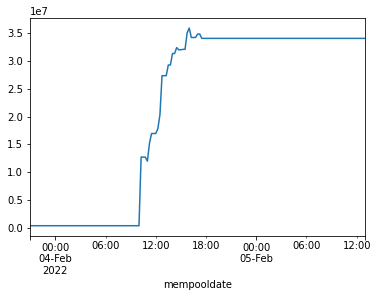

In [56]:
y_test.plot(use_index = True)

<AxesSubplot:xlabel='mempooldate'>

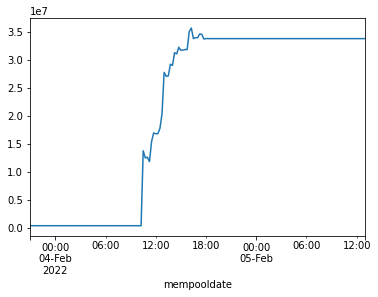

In [58]:
my_model.predict(X_test).plot(use_index = True)

In [60]:
more_raw = pd.read_json('../data/interim/new_test_data.json')

In [61]:
more_raw.head()

,feerate,fee,mempooldate,mempoolgrowthrate,networkdifficulty,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,dayofweek,hourofday,txid,hash,version,size,vsize,weight,locktime
0,4.923767,1098,1644613860,2134.733333,2.669053e+13,55.481256,63827936.5,4.162800e+07,1.860753e+08,43531.11,4,16,00000e71f2b58190d8291958398a70c76d9d2c1e5d6550...,cb0e4d37b2f5c6d246b69cccffd5d5255d05de7898a1a1...,2,223,142,565,0
1,25.000000,5600,1645810092,1186.550000,2.796715e+13,24.501851,4019092.0,3.064756e+07,1.996791e+08,38344.78,4,12,000044e34f48c3bd95b565b97830a75f29b064f8878cdb...,000044e34f48c3bd95b565b97830a75f29b064f8878cdb...,1,224,224,896,0
2,5.206148,2879,1644334214,1381.333333,2.669053e+13,23.436081,2375644.0,3.729036e+07,1.897149e+08,43834.02,1,10,000047895f1daf007ebcff65e3674c2ff798e3a0e5b67f...,7cbf1882da5a87312f895a03ac4a8f1373f22d9ffe945c...,1,553,309,1234,0
3,3.001314,2284,1645932232,656.566667,2.796715e+13,13.716759,1064401.5,3.393777e+07,1.954301e+08,39103.91,5,22,0000a290b4c1c5bc516c00c89ae74d0314e4825c80a6f0...,a176eeba5e05a097f399809f8be40b9f60861491678a8b...,2,761,439,1754,725076
4,7.343750,1410,1644599655,1180.666667,2.669053e+13,55.481256,48934065.0,4.162800e+07,1.860753e+08,43531.11,4,12,0000ade03d3e67e32f97cfdfb9cd6aa148e071aafa450e...,deea9026c76aa5bf6d6b506b43efbef68efcdceafdc59d...,2,192,110,438,0


In [73]:
new_test = more_raw.set_index('mempooldate').reset_index() 
new_test.mempooldate = pd.to_datetime(new_test.mempooldate.apply(as_date))

new_test = new_test.groupby('mempooldate').mean()

new_test = new_test.resample('15min').pad().iloc[1:,:]

In [77]:
col = 'mempoolsize'
new_test = new_test[['mempoolsize']]
for i in range(1,4):
        new_test[f'input_{i}'] = new_test[col].shift(i)
new_test.dropna(inplace = True)
new_test['time'] = range(0, len(new_test))
new_X = new_test.drop(columns = [col])
new_X = sm.add_constant(new_X)
new_y = new_test[col]

<AxesSubplot:xlabel='mempooldate'>

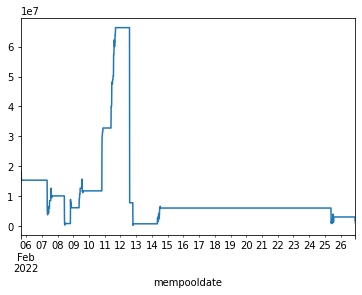

In [80]:
new_y.plot(use_index = True)

<AxesSubplot:xlabel='mempooldate'>

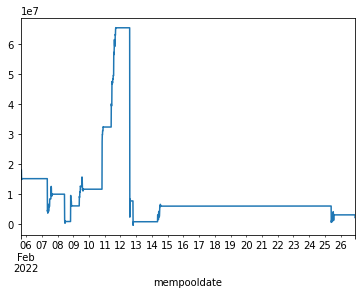

In [81]:
my_model.predict(new_X).plot(use_index = True)

In [83]:
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            mempoolsize   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.017e+04
Date:                Sat, 19 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:31:58   Log-Likelihood:                -20670.
No. Observations:                1440   AIC:                         4.135e+04
Df Residuals:                    1435   BIC:                         4.138e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8589.1157   2.19e+04      0.392      0.695   -3.43e+04    5.15e+04
input_1        1.0804      0.026     40.930      0.000       1.029       1.132
input_2       -0.1033      0.039     -2.664      0.008      -0.179      -0.027
input_3        0.0110      0.026      0.415      0.678      -0.041       0.063
time          33.2879     30.873      1.078      0.281     -27.273      93.849
==============================================================================
Omnibus:                     1434.162   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1280244.043
Skew:                           3.696   Prob(JB):                         0.00
Kurtosis:                     148.886   Cond. No.                     1.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""